<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/Crime_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset sobre taxa de ocorrência de crimes como roubo, furto e relacionados
*Os dados foram extraídos do sistema de Registro Digital de Ocorrências (R.D.O.) disponível no site www.ssp.sp.gov.br referente ao ano de 2016.*

Importando as bibliotecas necessárias para tratamento, estatística e visualização de dados:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando o arquivo:

In [ ]:
# Diretamente do GitHub:
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/Edited_CrimeRatesBrazil.csv'
data = pd.read_csv(url)

In [ ]:
# Lendo o arquivo CSV que foi carregado na página:
# data = pd.read_csv('Edited_CrimeRatesBrazil.csv')

# Siglas e termos

*DECAP = Departamento de Polícia Judiciária da Capital;



# Descrição das colunas
                    

*   NUM_BO = Número do B.O.
*   ANO_BO = Ano de resgitro do B.O.
*   ID_DELEGACIA = Código da delegacia responsável pelo registro da ocorrencia
*   NOME_DEPARTAMENTO = Nome do Dep
*   NOME_SECCIONAL = Nome da Delegacia Seccional responsável pelo registro
*   DELEGACIA = Nome da Delegacia responsável pelo registro
*   NOME_DEPARTAMENTO_CIRC = Nome do Departamento de Circunscrição
*   NOME_SECCIONAL_CIRC = Seccional de Circunscrição
*   NOME_DELEGACIA_CIRC = Delegacia de Circunscrição
*   ANO = Ano da ocorrência
*   MES = Mês da ocorrência
*   FLAG_STATUS = Status da Ocorrência
*   RUBRICA = Natureza jurídica da ocorrência
*   DESDOBRAMENTO = Desdobramento na Ocorrência
*   CONDUTA = Conduta na Ocorrência
*   LATITUDE = Latitude da Ocorrência 
*   LONGITUDE = Longitude da Ocorrência
*   CIDADE = Conduta da Ocorrência
*   LOGRADOURO = Logradouro dos fatos
*   NUMERO_LOGRADOURO = Numero do Logradouro dos fatos

Drogas = Drogas sem Autorização ou em Desacordo (art.33_caput),	
Furto = (art.155), 	FurtoQualificado = (art.155_4o.), Lesao = Lesão Corporal(art.129),  LesaoPorVeiculo = Lesão Corporal Culposa na Direção de Veículo Automotor (art.303),	Roubo = (art.157) 

#Limpeza e Tratamento
Procurando nulos e removendo: NA - Not Available e NaN - Not a Number.
Podemos ver que 5 colunas retornaram True, ou seja, possuem pelo menos um valor (any) indisponível ou vazio (isnull).

In [ ]:
print(data.isnull().any())
print()

NUM_BO                    False
ANO_BO                    False
ID_DELEGACIA              False
NOME_DEPARTAMENTO         False
NOME_SECCIONAL            False
DELEGACIA                 False
NOME_DEPARTAMENTO_CIRC    False
NOME_SECCIONAL_CIRC       False
NOME_DELEGACIA_CIRC       False
ANO                       False
MES                       False
FLAG_STATUS               False
RUBRICA                   False
DESDOBRAMENTO              True
CONDUTA                    True
LATITUDE                   True
LONGITUDE                  True
CIDADE                    False
LOGRADOURO                False
NUMERO_LOGRADOURO         False
FLAG_STATUS.1             False
Unnamed: 21                True
dtype: bool



*Observações:*
- A coluna DESDOBRAMENTO tem apenas 5 valores;
- As colunas CONDUTA, LATITUDE e LONGITUDE estão quase completas;
- Unnamed: 21 está vazia;
- FLAG_STATUS.1 é uma repetição de FLAG_STATUS.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  199 non-null    int64  
 1   ANO_BO                  199 non-null    int64  
 2   ID_DELEGACIA            199 non-null    int64  
 3   NOME_DEPARTAMENTO       199 non-null    object 
 4   NOME_SECCIONAL          199 non-null    object 
 5   DELEGACIA               199 non-null    object 
 6   NOME_DEPARTAMENTO_CIRC  199 non-null    object 
 7   NOME_SECCIONAL_CIRC     199 non-null    object 
 8   NOME_DELEGACIA_CIRC     199 non-null    object 
 9   ANO                     199 non-null    int64  
 10  MES                     199 non-null    int64  
 11  FLAG_STATUS             199 non-null    object 
 12  RUBRICA                 199 non-null    object 
 13  DESDOBRAMENTO           5 non-null      object 
 14  CONDUTA                 185 non-null    ob

*Observações:*

Podemos então apagar as colunas DESDOBRAMENTO, Unnamed: 21 e FLAG_STATUS.1, por falta ou insuficiência de valores.

Com drop podemos excluir as colunas (axis=1 são colunas, axis=0 são linhas) sem utilidade, salvando em um novo dataframe (recebido pela variável data2) e depois salvando num outro arquivo csv (com to_csv):

In [ ]:
data2 = data.drop('DESDOBRAMENTO', axis=1)
data2.to_csv('data_semDesdob.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto,TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000,C,NaN
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0,C,NaN
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,Drogas,NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0,C,NaN
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo,CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15,C,NaN
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,Lesao,NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625,C,NaN


In [ ]:
data2 = data2.drop('Unnamed: 21', axis=1)
data2.to_csv('data_semUnnamed.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto,TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000,C
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0,C
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,Drogas,NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0,C
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo,CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15,C
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,Lesao,NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625,C


In [ ]:
data2 = data2.drop('FLAG_STATUS.1', axis=1)
data2.to_csv('data_semFlag.1.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO
0,3784,2016,10101,DECAP,DEL.SEC.1CENTRO,01D.P.SE,DECAP,DEL.SEC.1CENTRO,78D.P.JARDINS,2016,7,C,Furto,TRANSEUNTE,-23.564984,46.652035,S.PAULO,AVENIDAPAULISTA,1000
1,3426,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,5,C,Roubo,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAADAREPUBLICA,0
2,6359,2016,10102,DECAP,DEL.SEC.1CENTRO,02D.P.BOMRETIRO,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,2016,10,C,Drogas,NaN,-23.542183,-46.640599,S.PAULO,RUACONSELHEIRONEBIAS,0
3,1267,2016,10103,DECAP,DEL.SEC.1CENTRO,03D.P.CAMPOSELISEOS,DECAP,DEL.SEC.8SAOMATEUS,49D.P.SAOMATEUS,2016,3,C,Roubo,CARGA,-23.609275,-46.455087,S.PAULO,RUAMADUREIRACALHEIROS,15
4,4804,2016,10106,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,DECAP,DEL.SEC.1CENTRO,06D.P.CAMBUCI,2016,12,C,Lesao,NaN,-23.573928,-46.620693,S.PAULO,RUAROBERTSON,625


*Observações:*

Ao vermos a contagem da tabela Flag_status, vemos que todos os seus valores são iguais, portanto será deletada por não ter utilidade no estudo.

In [ ]:
data2['FLAG_STATUS'].value_counts()

C    199
Name: FLAG_STATUS, dtype: int64

In [ ]:
data2 = data2.drop('FLAG_STATUS', axis=1)
data2.to_csv('data_semFlag2.csv', index= False)

*Observações:*

Falta tratar as colunas CONDUTA, LATITUDE E LONGITUDE.

In [ ]:
print(data2.isnull().any())
print()

NUM_BO                    False
ANO_BO                    False
ID_DELEGACIA              False
NOME_DEPARTAMENTO         False
NOME_SECCIONAL            False
DELEGACIA                 False
NOME_DEPARTAMENTO_CIRC    False
NOME_SECCIONAL_CIRC       False
NOME_DELEGACIA_CIRC       False
ANO                       False
MES                       False
RUBRICA                   False
CONDUTA                    True
LATITUDE                   True
LONGITUDE                  True
CIDADE                    False
LOGRADOURO                False
NUMERO_LOGRADOURO         False
dtype: bool



Começando por CONDUTA, vemos que um dos valores é muito frequente e poderia ser usado para substituir os dados NA.

In [ ]:
data2['CONDUTA'].value_counts()

TRANSEUNTE                    80
VEICULO                       35
OUTROS                        19
INTERIORTRANSPORTECOLETIVO    18
INTERIORDEVEICULO              9
RESIDENCIA                     8
INTERIORESTABELECIMENTO        7
ESTABELECIMENTOCOMERCIAL       3
CARGA                          2
ESTABELECIMENTOBANCARIO        1
ESTABELECIMENTOENSINO          1
CONDOMINIOCOMERCIAL            1
ESTABELECIMENTO-OUTROS         1
Name: CONDUTA, dtype: int64

Assim, preencheremos NA e NaN com a palavra TRANSEUNTE.

In [ ]:
data2['CONDUTA'].fillna('TRANSEUNTE', inplace=True)

In [ ]:
data2['CONDUTA'].value_counts()

TRANSEUNTE                    94
VEICULO                       35
OUTROS                        19
INTERIORTRANSPORTECOLETIVO    18
INTERIORDEVEICULO              9
RESIDENCIA                     8
INTERIORESTABELECIMENTO        7
ESTABELECIMENTOCOMERCIAL       3
CARGA                          2
ESTABELECIMENTOBANCARIO        1
ESTABELECIMENTOENSINO          1
CONDOMINIOCOMERCIAL            1
ESTABELECIMENTO-OUTROS         1
Name: CONDUTA, dtype: int64

Faremos o mesmo com as colunas restantes (latitude e longitude). Preencheremos NA e NaN com o dado mais frequente:

In [ ]:
data2['LATITUDE'].value_counts()

-23.542476    2
-23.609275    1
-23.800623    1
-23.657200    1
-23.559255    1
             ..
-23.556510    1
-23.605368    1
-23.434273    1
-23.611308    1
-23.491977    1
Name: LATITUDE, Length: 187, dtype: int64

In [ ]:
data2['LATITUDE'].fillna('-23.542476', inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  199 non-null    int64  
 1   ANO_BO                  199 non-null    int64  
 2   ID_DELEGACIA            199 non-null    int64  
 3   NOME_DEPARTAMENTO       199 non-null    object 
 4   NOME_SECCIONAL          199 non-null    object 
 5   DELEGACIA               199 non-null    object 
 6   NOME_DEPARTAMENTO_CIRC  199 non-null    object 
 7   NOME_SECCIONAL_CIRC     199 non-null    object 
 8   NOME_DELEGACIA_CIRC     199 non-null    object 
 9   ANO                     199 non-null    int64  
 10  MES                     199 non-null    int64  
 11  RUBRICA                 199 non-null    object 
 12  CONDUTA                 199 non-null    object 
 13  LATITUDE                199 non-null    object 
 14  LONGITUDE               188 non-null    fl

In [ ]:
data2['LONGITUDE'].value_counts()

-46.641928    2
-46.515966    1
-46.506067    1
-46.746090    1
-46.635213    1
             ..
-46.405933    1
-46.630083    1
-46.548444    1
-46.558250    1
-46.706705    1
Name: LONGITUDE, Length: 187, dtype: int64

In [ ]:
data2['LONGITUDE'].fillna('-46.641928', inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NUM_BO                  199 non-null    int64 
 1   ANO_BO                  199 non-null    int64 
 2   ID_DELEGACIA            199 non-null    int64 
 3   NOME_DEPARTAMENTO       199 non-null    object
 4   NOME_SECCIONAL          199 non-null    object
 5   DELEGACIA               199 non-null    object
 6   NOME_DEPARTAMENTO_CIRC  199 non-null    object
 7   NOME_SECCIONAL_CIRC     199 non-null    object
 8   NOME_DELEGACIA_CIRC     199 non-null    object
 9   ANO                     199 non-null    int64 
 10  MES                     199 non-null    int64 
 11  RUBRICA                 199 non-null    object
 12  CONDUTA                 199 non-null    object
 13  LATITUDE                199 non-null    object
 14  LONGITUDE               199 non-null    object
 15  CIDADE

Agora todos os campos estão preenchidos, então a pesquisa por nulos retorna False:

In [ ]:
print(data2.isnull().any())
print()

NUM_BO                    False
ANO_BO                    False
ID_DELEGACIA              False
NOME_DEPARTAMENTO         False
NOME_SECCIONAL            False
DELEGACIA                 False
NOME_DEPARTAMENTO_CIRC    False
NOME_SECCIONAL_CIRC       False
NOME_DELEGACIA_CIRC       False
ANO                       False
MES                       False
RUBRICA                   False
CONDUTA                   False
LATITUDE                  False
LONGITUDE                 False
CIDADE                    False
LOGRADOURO                False
NUMERO_LOGRADOURO         False
dtype: bool



# Analisando os dados
- Com describe, vemos que apesar de ser referente ao ano de 2016, há pelo menos uma ocorrência de 2017 (última linha -> max, col ANO_BO), o que pode significar que ao menos um crime ocorrido em 2016 só foi registrado no ano seguinte.

- A média 

In [535]:
data2.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,NUMERO_LOGRADOURO
count,1.990000e+02,199.000000,199.000000,199.0,199.000000,199.000000
mean,4.687784e+05,2016.020101,500213.251256,2016.0,6.658291,688.437186
std,5.535074e+05,0.140698,437009.554279,0.0,3.374566,1437.826725
min,3.600000e+01,2016.000000,10004.000000,2016.0,1.000000,0.000000
25%,3.555500e+03,2016.000000,25201.500000,2016.0,4.000000,37.500000
50%,1.442190e+05,2016.000000,900020.000000,2016.0,7.000000,248.000000
75%,8.584790e+05,2016.000000,900020.000000,2016.0,10.000000,549.000000
max,1.649798e+06,2017.000000,900020.000000,2016.0,12.000000,13913.000000


#Verificando frequência de crimes


*Observações:*

O mês com maior ocorrência de crimes é Julho, seguido de Novembro e Abril, tendo estes dois últimos o mesmo resultado.

In [ ]:
data2['MES'].value_counts()

7     23
11    21
4     21
6     17
12    16
3     16
10    15
8     15
9     14
5     14
2     14
1     13
Name: MES, dtype: int64

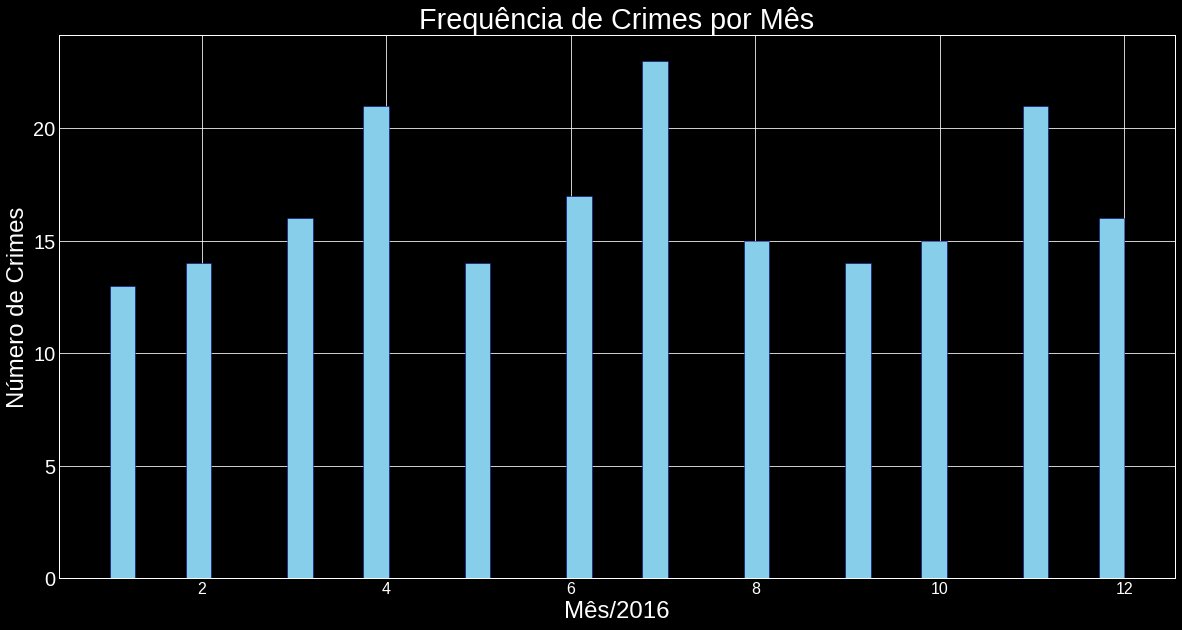

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.hist(mes, bins=40, color = "skyblue", ec="darkblue")
plt.title('Frequência de Crimes por Mês')
plt.ylabel('Número de Crimes')
plt.xlabel('Mês/2016')
plt.rcParams.update({'font.size': 20})
plt.show()

*Observações:*

A coluna mais importante para o nosso estudo é a Rubrica, a qual traz a natureza do crime. Podemos ver que o tipo de crime mais frequente é o furto, seguido do roubo. 

In [ ]:
data2['RUBRICA'].value_counts()

Furto               92
Roubo               78
FurtoQualificado    15
Lesao               10
Drogas               2
LesaoPorVeiculo      2
Name: RUBRICA, dtype: int64

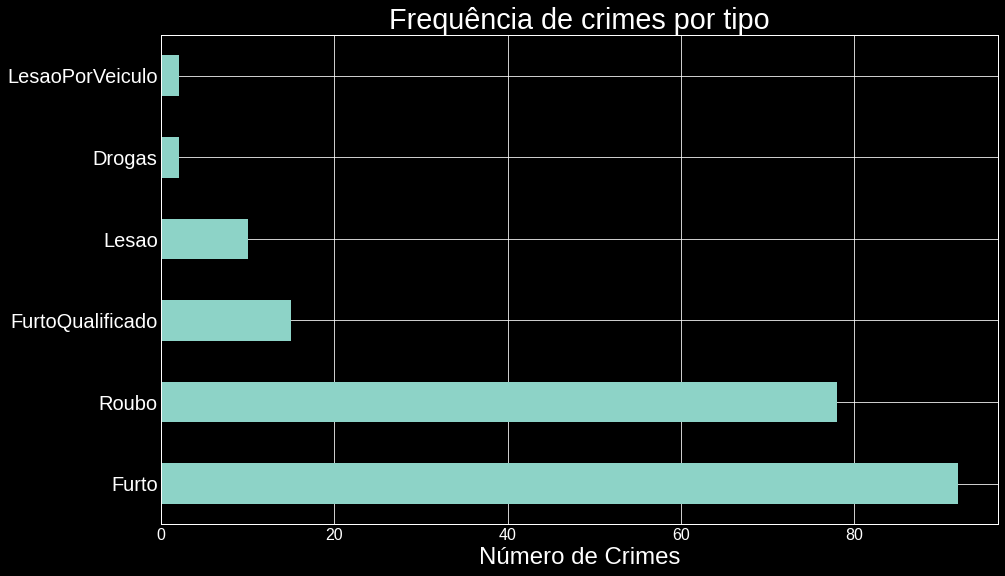

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.xlabel('Número de Crimes')
data2['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.show()


# Visualizando o mapa de calor para a ocorrência de crimes por região geográfica do estado de São Paulo.

Por meio do mapa seguinte, observamos o quanto as ocorrências estão concentrados na capital, certamente devido à densidade populacional desta área. 

Para visualizar no mapa, precisaremos instalar e importar a lib Folium

In [ ]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-3gecpqvr
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-3gecpqvr
  Created wheel for folium: filename=folium-0.11.0+23.g0a8b9b9-py2.py3-none-any.whl size=97592 sha256=ee7e9bd4d1d6ed4dfd78ef8b6dada0a8b89011fafba3a5a1c2b9b285e31d299c
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_bbpo7q/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [ ]:
import os
import folium
import pandas as pd
print(folium.__version__)

0.11.0+23.g0a8b9b9


In [ ]:
from folium import plugins
coordenadas = []
lat = data2['LATITUDE'][:100].values
long = data2['LONGITUDE'][:100].values

mapa = folium.Map(location=[-23.542183, -46.640599],tiles='Stamen Toner',zoom_start=12)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa.add_child(plugins.HeatMap(coordenadas))
mapa